#### Setup

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from tqdm import tqdm 
# from iterools import Counter
from qumcmc import *
from collections import Counter

In [102]:
def convergence_data_plot(DATA, nspins:int,to_check:str= 'kldiv', init:int =1, paper_plot= False, dpi = 1200):
    df_cl = pd.DataFrame(); df_q = pd.DataFrame()
    for i in range(init, DATA.shape[1]+1):
        df_cl[i] = DATA[i]['classical'][to_check]
        df_q[i] = DATA[i]['quantum'][to_check]

    plt.figure(figsize=(10,8))


    plt.plot(df_q.mean(axis=1), label= 'Quantum Enhanced')
    plt.fill_between(range(df_q.shape[0]),y1=df_q.mean(axis=1)-0.5*df_q.std(axis=1),y2=df_q.mean(axis=1)+0.5*df_q.std(axis=1), alpha = 0.4)


    plt.plot(df_cl.mean(axis=1), label = 'Classical Uniform')
    plt.fill_between(range(df_cl.shape[0]),y1=df_cl.mean(axis=1)-0.5*df_cl.std(axis=1),y2=df_cl.mean(axis=1)+0.5*df_cl.std(axis=1), alpha = 0.3)
        
    plt.xlabel("MCMC Iterations", fontdict=)
    plt.ylabel("KL Divergence")
    plt.yscale('log')
    if paper_plot : 
        plt.title(' Num spins : '+ str(nspins))
    else :
        plt.title('MCMC Analytics: Convergence of KL Div. |'+ ' nspins : '+ str(nspins))
    # plt.grid()
    
    plt.legend()
    if paper_plot :
        plt.savefig('SamplingData/plots/kldiv-n'+str(nspins)+'.png', dpi = dpi)
    else:
        plt.show()

def acceptance_prob_hist(DATA, nspins: int, init:int= 1, trunc:int = -12, paper_plot= False, dpi= 1200):

    classical_acp = []; quantum_acp = []
    for i in tqdm(range(init, DATA.shape[1]+1)):
        classical_acp += DATA[i]['classical']['acceptance_prob']
        quantum_acp += DATA[i]['quantum']['acceptance_prob']
    quantum_acp = np.array(quantum_acp); classical_acp = np.array(classical_acp)
    
    
    plt.figure(figsize=(10,10))
    
    result = np.where(quantum_acp > 10**(trunc), quantum_acp, trunc)  ### introduce truncation for numerics 
    plt.hist(np.log10(result, out=result, where=result > 0),label= 'Quantum Enhanced' , alpha= 0.8, bins= 35, edgecolor= 'none')
    
    result = np.where(classical_acp > 10**(trunc), classical_acp, trunc)   ### introduce truncation for numerics 
    plt.hist(np.log10(result, out=result, where=result > 0),label= 'Classical Uniform' ,alpha= 0.5, bins= 35, edgecolor= 'none')
    
    
   

    plt.xlabel("Acceptance Probabilities | scale: log10")

    if paper_plot:
        plt.title(' Num spins : '+ str(nspins))
    else:
        plt.title('MCMC Analytics: Comparison of Accp. Probabilities |'+ ' nspins : '+ str(nspins))
    plt.legend()
   
    if paper_plot :
        plt.savefig('SamplingData/plots/acprob-n'+str(nspins)+'.png', dpi = dpi)
    else:
        plt.show()
    
        

In [103]:
sns.set_theme(context = 'paper')
sns.set_style('ticks')

In [127]:
plt.rcParams.update({'font.size': 22})

### **5 qubit**

In [125]:
DATA5 = pd.read_json('SamplingData/DATA_5qubit.json')

#### KL Div

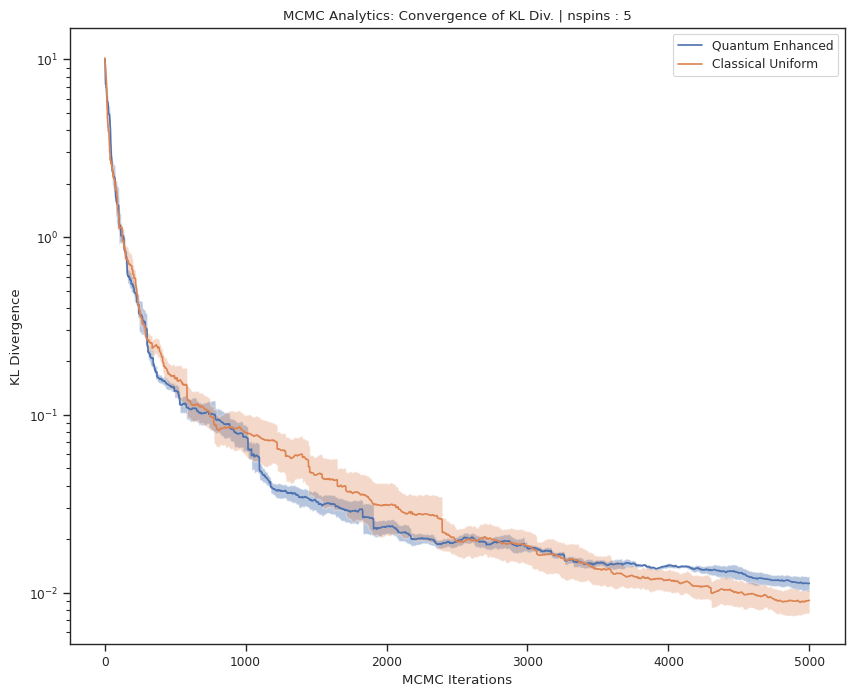

In [128]:
convergence_data_plot(DATA5, to_check='kldiv', nspins= 5)

#### Acceptance Prob

100%|██████████| 5/5 [00:00<00:00, 13426.07it/s]


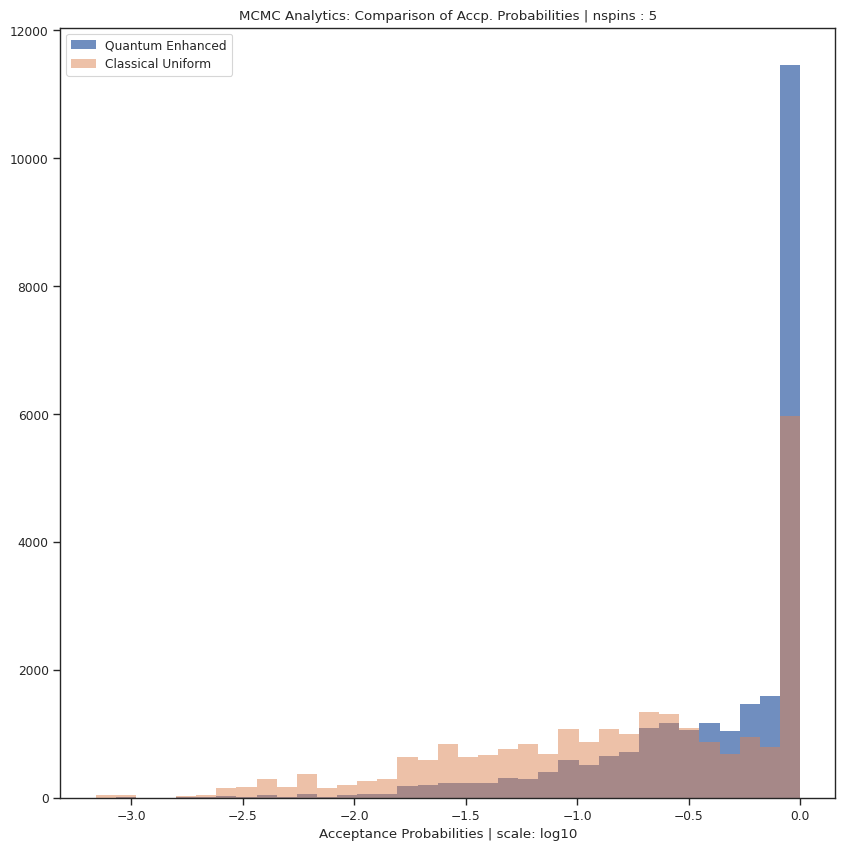

In [106]:
acceptance_prob_hist(DATA5, nspins=5)

### **10 Qubits**

In [107]:
DATA10 = pd.read_json('SamplingData/DATA_10qubit.json')

#### KL Div

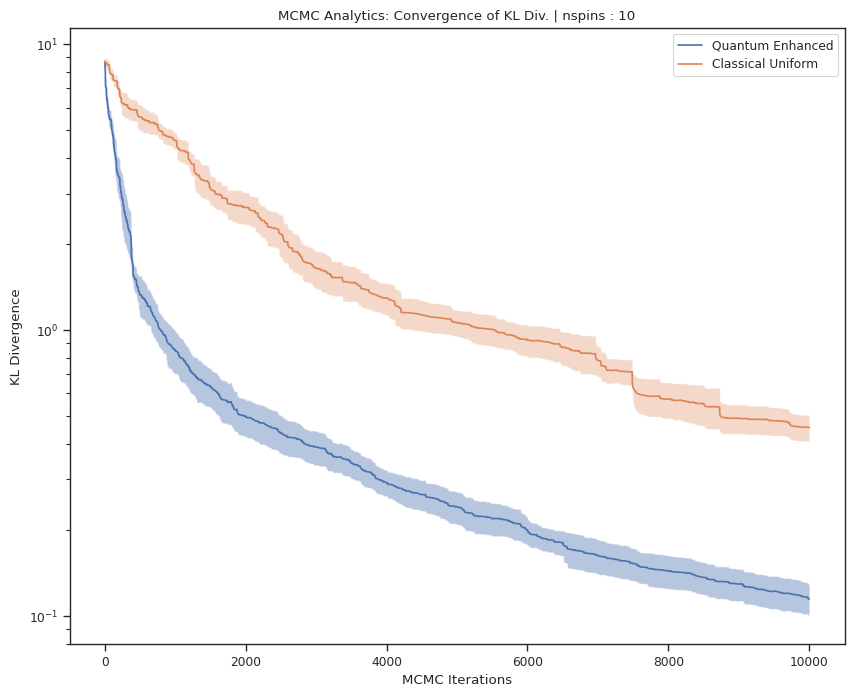

In [108]:
convergence_data_plot(DATA10, to_check= 'kldiv', nspins=10)

100%|██████████| 5/5 [00:00<00:00, 3544.28it/s]


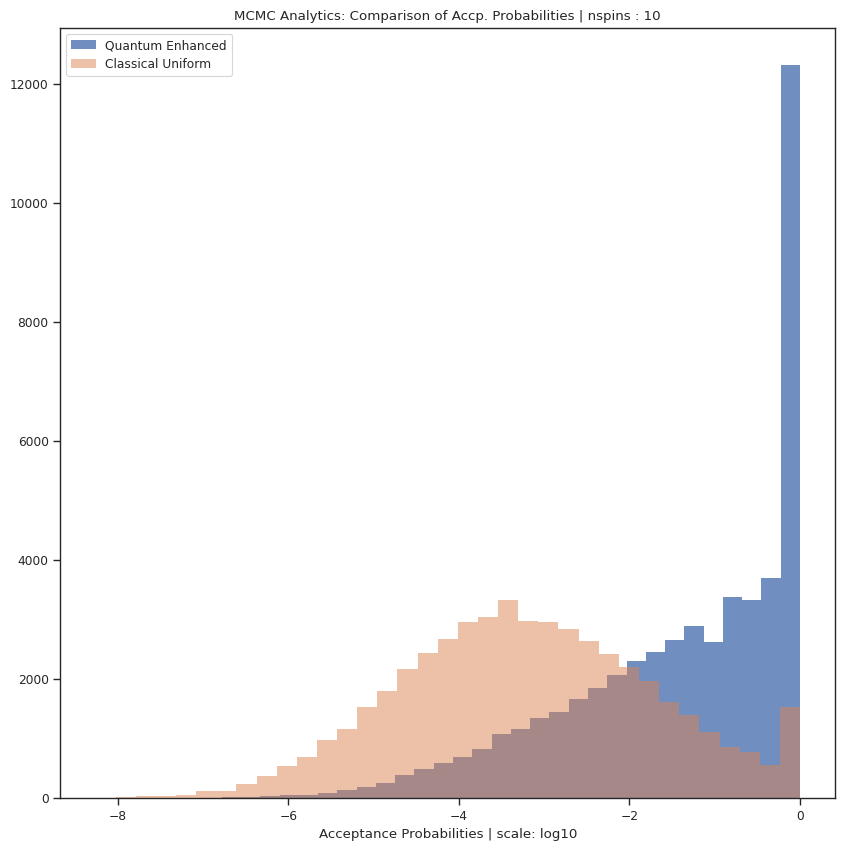

In [109]:
acceptance_prob_hist(DATA10, 10)

### **15 Qubits**

In [110]:
DATA15 = pd.read_json('SamplingData/DATA_15qubit.json')

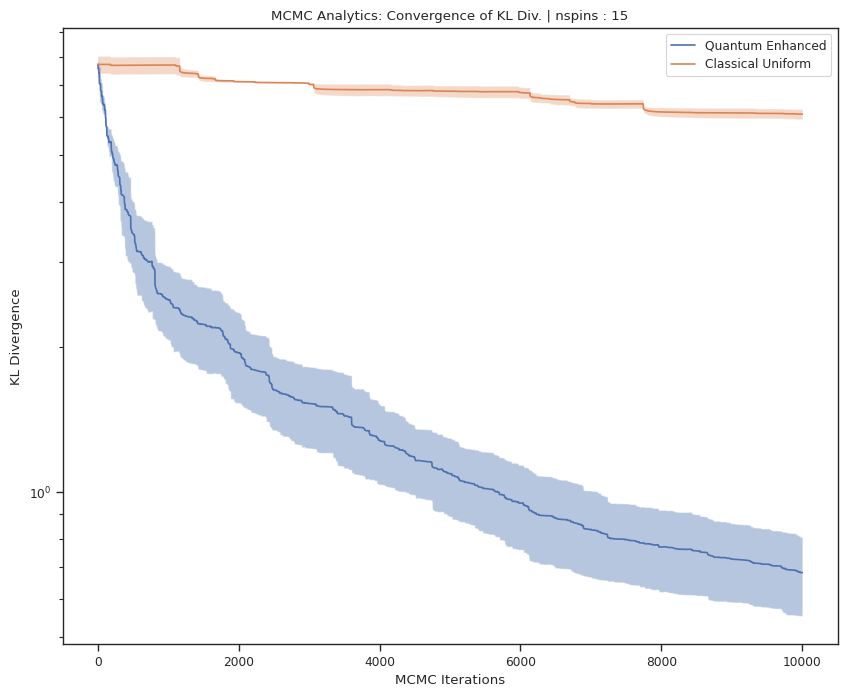

In [111]:
convergence_data_plot(DATA15, to_check= 'kldiv', nspins=15, init= 2)

100%|██████████| 3/3 [00:00<00:00, 4373.62it/s]


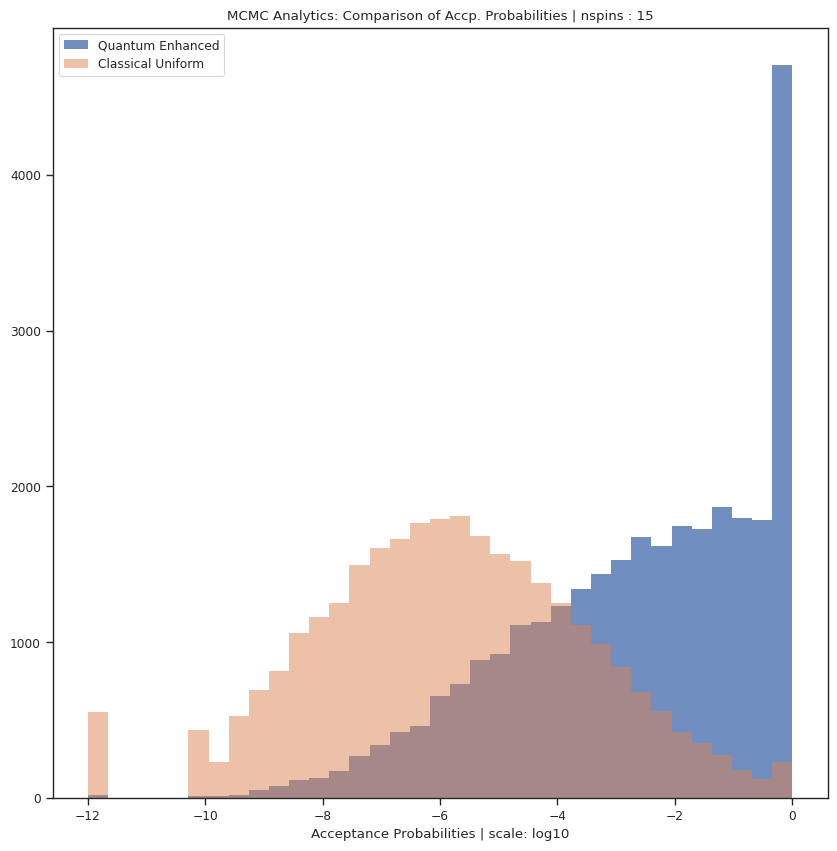

In [112]:
acceptance_prob_hist(DATA15, nspins= 15, init= 2)

### **Plots for Paper**

100%|██████████| 3/3 [00:00<00:00, 10681.59it/s]


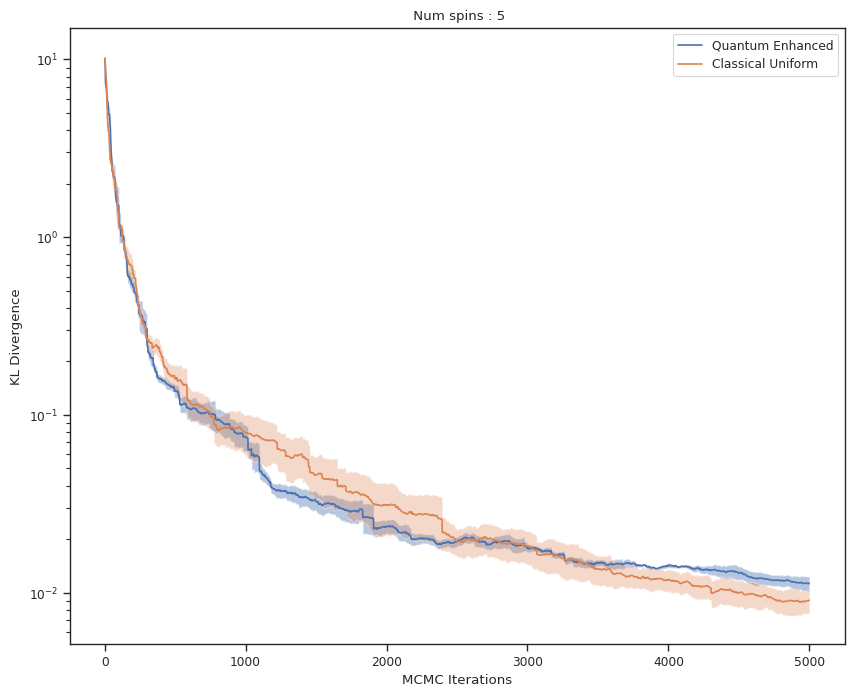

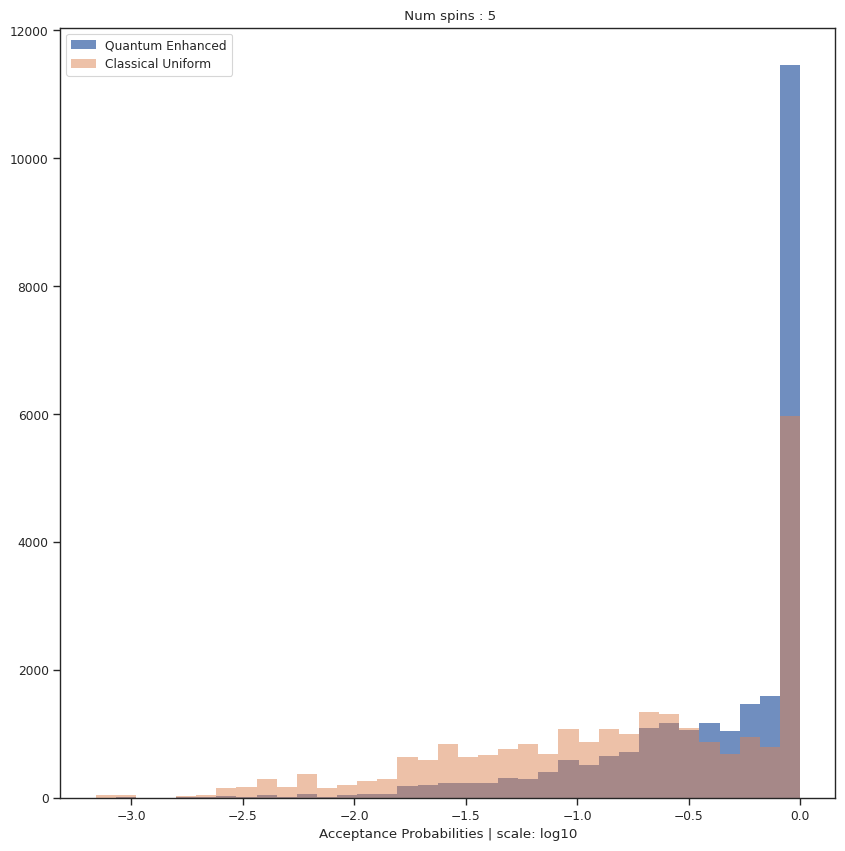

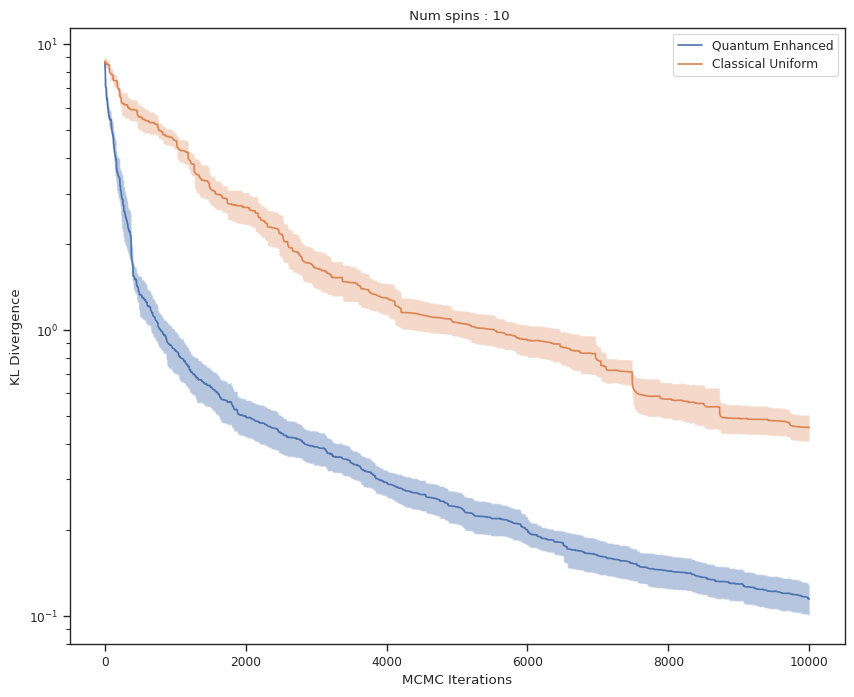

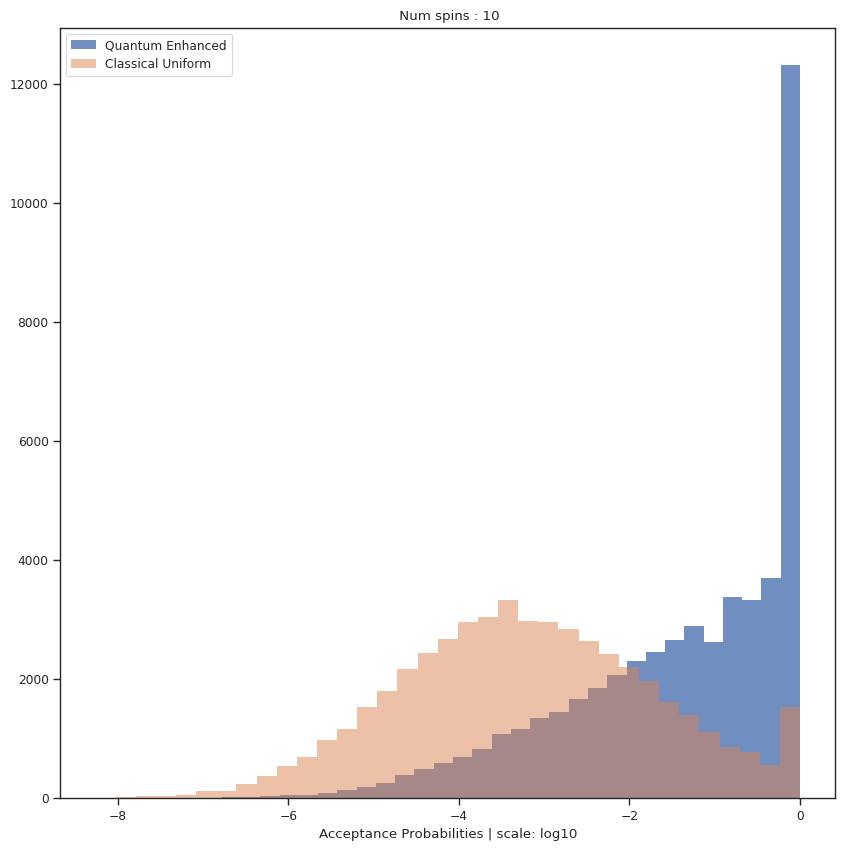

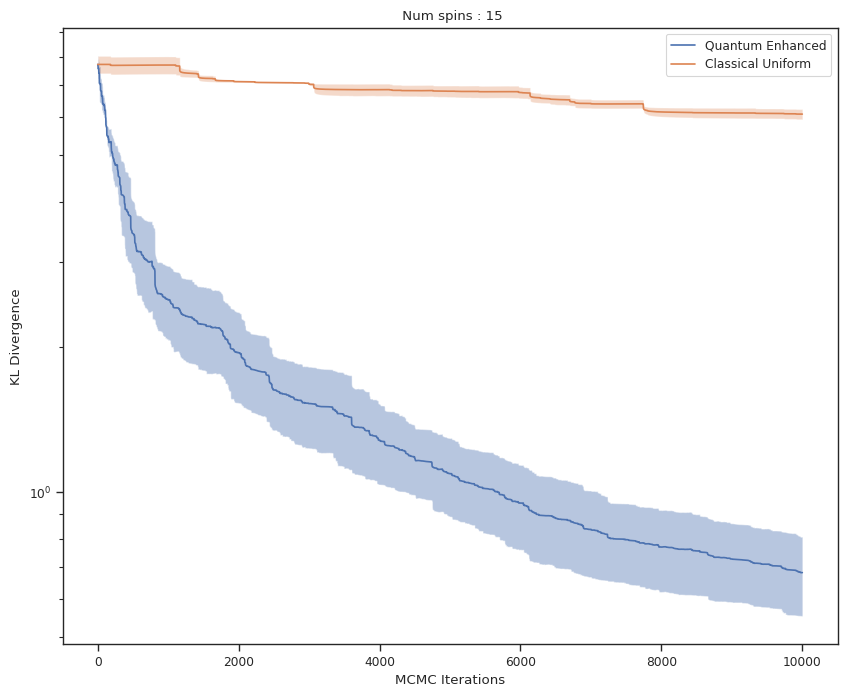

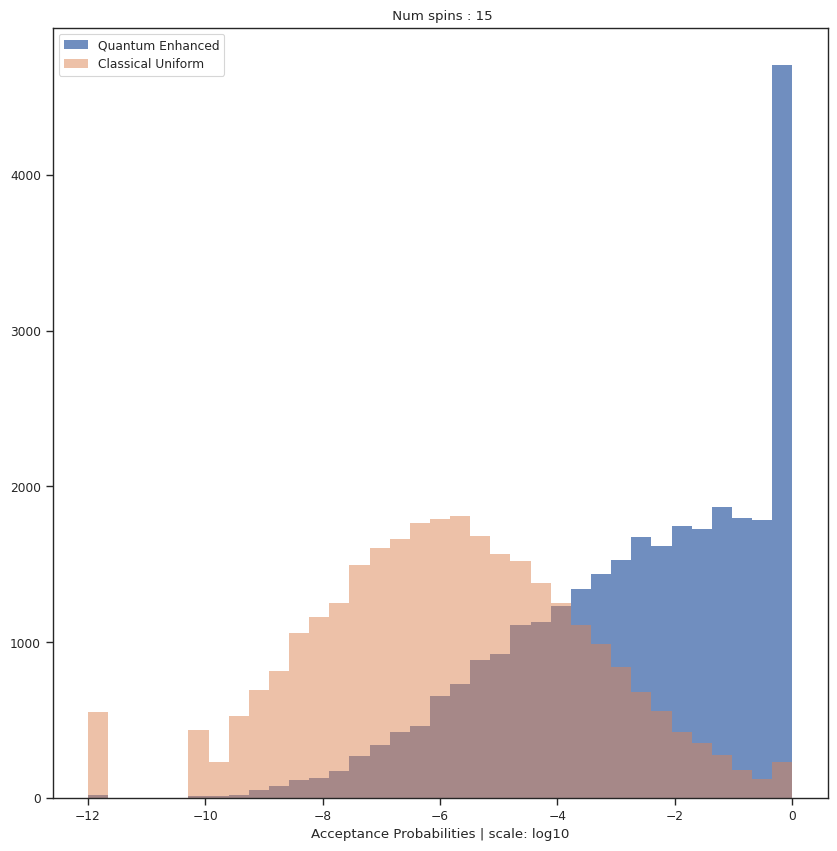

In [113]:
data = [DATA5, DATA10, DATA15]
nspin = [5, 10, 15]
fig_dpi = 300
for d, n in zip(data, nspin):
    if n == 15: convergence_data_plot(d,n, init= 2,paper_plot= True, dpi= fig_dpi); acceptance_prob_hist(d,n, init=2, paper_plot= True, dpi = fig_dpi)
    else: convergence_data_plot(d,n, paper_plot= True, dpi= fig_dpi);acceptance_prob_hist(d,n, paper_plot= True, dpi= fig_dpi)

In [114]:
im = plt.imread('SamplingData/plots/kldiv-n5.png')

Text(0.5, 1.0, 'something')

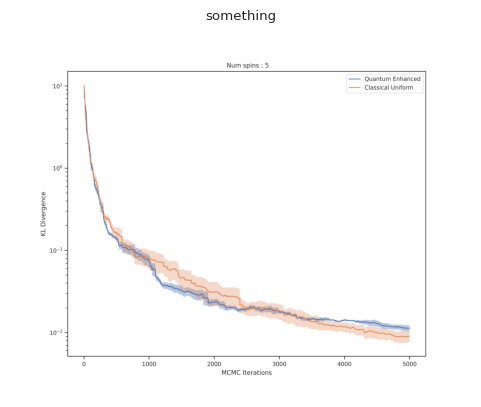

In [115]:
plt.imshow(im)
plt.axis('off')
plt.title('something')

In [116]:
\def\imsize{1.0}
\begin{figure}
     \centering
     \begin{subfigure}[b]{0.5\textwidth}
         \centering
         \includegraphics[width=\textwidth]{figures/acprob-n5.png}
         
         \label{fig:mcmcdata-acprob-n5}
     \end{subfigure}
     \hfill
     \begin{subfigure}[b]{0.5\textwidth}
         \centering
         \includegraphics[width=\textwidth]{figures/acprob-n10.png}
         
         \label{fig:mcmcdata-acprob-n10}
     \end{subfigure}
     \hfill
     \begin{subfigure}[b]{0.5\textwidth}
         \centering
         \includegraphics[width=\textwidth]{figures/acprob-n15.png}
         
         \label{fig:mcmcdata-acprob-n15}
     \end{subfigure}
        \caption{MCMC Data: Comparison of Acceptance Probability}
        \label{fig:mcmcdata-acprob}
\end{figure}


SyntaxError: unexpected character after line continuation character (1826310257.py, line 1)